# Partition problem

### Introduction
The background to the partition problem is described in **MOD007357 Coursework Brief 2021-22 (Task C)**, including the description of six simple splitting approaches (labelled A-F).

### Implementation summary
The splitting algorithms have been implemented in the *python* programming language, and can be conveniently applied to an input array (*multiset*) by initialising an `ArraySplitter` class with the array, and calling the class' `split()` method - providing a string key for the required method.

The described methods A-F have been extended with method 'G' - an implementation of the KK splitting algorithm<sup>1</sup>.

### ZIP archive
The code and output of running the `main()` method can be found in the associated ZIP archive (`partition-problem.zip`).  Contents:

```
partition-problem.zip
  - Partition problem.html
  - Partition problem.ipynb
  - partition_problem.py
  - README.md
  - environment.yml
  results/
    - comparison_pandas.png
    - comparison_seaborn.png
    - testing_df.csv
    - walkthrough_examples.txt
```

### Dependencies
The `conda` environment required to run the `partition_problem.py` code, and this notebook, can be recreated from the *environment.yml* file in the ZIP archive, and activated as follows:

```bash
conda env create -f environment.yml
conda activate partition-problem
```

We can use a jupyter 'magic' command to generate the *environment.yml* file.

In [1]:
!conda env export --from-history > environment.yml

### Notebook
This notebook was created within the same python `conda` environment used to run the `partition_problem.py`.

To generate the PDF version, the notebook was exported to HTML format and then printed to PDF format from Google Chrome.

### Imports

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from partition_problem import ArraySplitter
from partition_problem import generate_random_array, run_tests, seaborn_plot, pandas_plot

pd.set_option('display.max_rows', 10)  # Keep table displays short
sns.set_context('talk')  # This will make seaborn's plots have good font sizes, line widths, etc 

### Split method G - the Karmarkar-Karp heuristic (KK)
The KK method - described in section 2.3 of [1] - was implemented as an additional method of the `ArraySplitter` class, and is reproduced below for reference.

In [3]:
# Approach G - time complexity O(nlogn)?
def _split_KK(self, array):
    """Sorts high to low, then removes the first two members of the array.
    The 2nd value is subtracted from the first value, and the difference is appended to the end of the list.
    The list is then resorted, and the process is repeated until the list length is 1.

    Finally the list is passed back as s1_, and an empty list is passed back as s2_.
    This is a different approach to the other algorithms, hence the different variable naming for clarity.

    Passing back the two lists allows downstream calculation of the absolute subset sum difference (even though
    we already know the answer)
    """
    s1_ = []
    s2_ = []

    reverse_sorted_array = sorted(array, reverse=True)  # O(nlogn)
    while len(reverse_sorted_array) > 1:  # O(n/2)
        elem_0 = reverse_sorted_array.pop(0)
        elem_1 = reverse_sorted_array.pop(0)
        reverse_sorted_array.append(elem_0 - elem_1)
        reverse_sorted_array.sort(reverse=True)  # O(nlogn)
    # We know the difference at this point, but we are not using or returning it
    s1_ = reverse_sorted_array
    return s1_, s2_

### Walkthrough examples
The splitting applied by each method can be seen below for a single input array of cardinality 32.

#### Generate the array

In [4]:
array = generate_random_array(min_val=1, max_val=320, cardinality=32)
print(array)

[2, 249, 147, 187, 123, 190, 31, 282, 49, 130, 309, 192, 220, 51, 242, 149, 141, 64, 225, 20, 53, 88, 291, 274, 92, 174, 120, 119, 56, 3, 211, 118]


#### Apply each splitting method in turn

In [5]:
splitter = ArraySplitter(array)
results = splitter.compare_methods(verbose=True)

Method: A
Time complexity: O(n)
  Subset 1: [2, 249, 147, 187, 123, 190, 31, 282, 49, 130, 309, 192, 220, 51, 242, 149]
  Subset 2: [141, 64, 225, 20, 53, 88, 291, 274, 92, 174, 120, 119, 56, 3, 211, 118]
  Absolute partition difference: 504

Method: B
Time complexity: O(n)
  Subset 1: [2, 190, 282, 130, 192, 220, 242, 64, 20, 88, 274, 92, 174, 120, 56, 118]
  Subset 2: [249, 147, 187, 123, 31, 49, 309, 51, 149, 141, 225, 53, 291, 119, 3, 211]
  Absolute partition difference: 74

Method: C
Time complexity: O(n)
  Subset 1: [2, 147, 187, 190, 49, 130, 192, 220, 149, 141, 20, 53, 88, 291, 174, 119, 118]
  Subset 2: [249, 123, 31, 282, 309, 51, 242, 64, 225, 274, 92, 120, 56, 3, 211]
  Absolute partition difference: 62

Method: D
Time complexity: O(n)
  Subset 1: [249, 190, 309, 220, 149, 291, 174, 2, 123, 31, 49, 51, 141, 88, 120, 56]
  Subset 2: [147, 187, 282, 192, 242, 225, 274, 211, 130, 64, 20, 53, 92, 119, 3, 118]
  Absolute partition difference: 116

Method: E
Time complexity: O(n

### Input parameters
The parameters below can be varied and will control the subsequent code blocks.  These are the same parameters accepted by the `main()` function of `partition_problem.py`.

In [6]:
CARDINALITIES = [32, 64, 128, 256, 512, 1024]
REPEATS = 100
MIN_ARRAY_VAL = 1
MAX_VAL_FACTOR = 10

### Running tests
For each *cardinality* value we will run *number_of_tests* tests.

Each test involves the following steps:
1. Make a new random array
2. Make an `ArraySplitter` instance for the random array
3. Use the ArraySplitter's `compare_methods()` function to get the absolute difference of the subset sums for each different split method
4. Add the results from the iteration to a list that keeps track of all of the results

In [7]:
testing_results = []  # a list to keep each iteration's results in
for cardinality in CARDINALITIES:  # iterate over cardinalities
    for test in range(REPEATS):  # then iterate over n tests (eg 100)
        # 1. Make a new random array
        array = generate_random_array(min_val=MIN_ARRAY_VAL,
                                      max_val=MAX_VAL_FACTOR * cardinality,
                                      cardinality=cardinality)
        # 2. Use an ArraySplitter to get the results for each available split method
        splitter = ArraySplitter(array)
        results = splitter.compare_methods()
        # 3. Add the cardinality info to the result
        results['cardinality'] = cardinality
        # 4. add the result to the testing_results list
        testing_results.append(results)

In `partition_problem.py` the above steps can be conveniently run by simply calling the `run_tests()` method.

In [8]:
testing_results = run_tests(cardinalities=CARDINALITIES, repeats=REPEATS,
                            min_array_val=MIN_ARRAY_VAL, max_val_factor=MAX_VAL_FACTOR)

An example result in the list (showing the dictionary structure):

In [9]:
testing_results[0]

{'A': 475,
 'B': 1859,
 'C': 115,
 'D': 85,
 'E': 223,
 'F': 1,
 'G': 1,
 'cardinality': 32}

If we convert the whole `testing_results` list of dictionaries into a DataFrame, we get the following shape.

In [10]:
testing_df = pd.DataFrame(testing_results)
testing_df

,A,B,C,D,E,F,G,cardinality
0,475,1859,115,85,223,1,1,32
1,43,39,55,17,193,7,1,32
2,86,1226,30,28,194,22,0,32
3,146,792,136,70,174,4,0,32
4,652,2052,156,32,160,4,0,32
...,...,...,...,...,...,...,...,...
595,35892,176726,4614,1336,5062,0,0,1024
596,141755,7181,5553,3337,5149,7,1,1024
597,48614,169468,2908,2974,4938,2,0,1024
598,36908,317410,6872,182,4858,6,0,1024


### Plotting with Seaborn
The above shape of the data is convenient for readability, but not so good for certain plotting approaches.  The `seaborn` package makes plotting data (including data from a `pandas.DataFrame`) easy, but it is best to provide the data in a "tall, skinny" format.

#### Convert raw results into tall-skinny DataFrame
The raw data can be unpivotted using `pandas.melt()`.  This gives us the tall, skinny version of the output data where each method appears not as a column, but as a value in a single 'method' column.

In [11]:
tall_df = pd.melt(testing_df, id_vars=['cardinality'],
                  value_vars=splitter.func_dict.keys(),
                  var_name='method', value_name='absolute_diff')
tall_df

,cardinality,method,absolute_diff
0,32,A,475
1,32,A,43
2,32,A,86
3,32,A,146
4,32,A,652
...,...,...,...
4195,1024,G,0
4196,1024,G,1
4197,1024,G,0
4198,1024,G,0


#### Plot
Seaborn's `lineplot()` method is an appropriate choice.  This method will plot the mean of the data, and can automatically show variation from the mean in a number of ways.  As we are probably most interested in how confident we are in the predicted mean values, 95% confidence intervals have been chosen (rather than standard deviations).

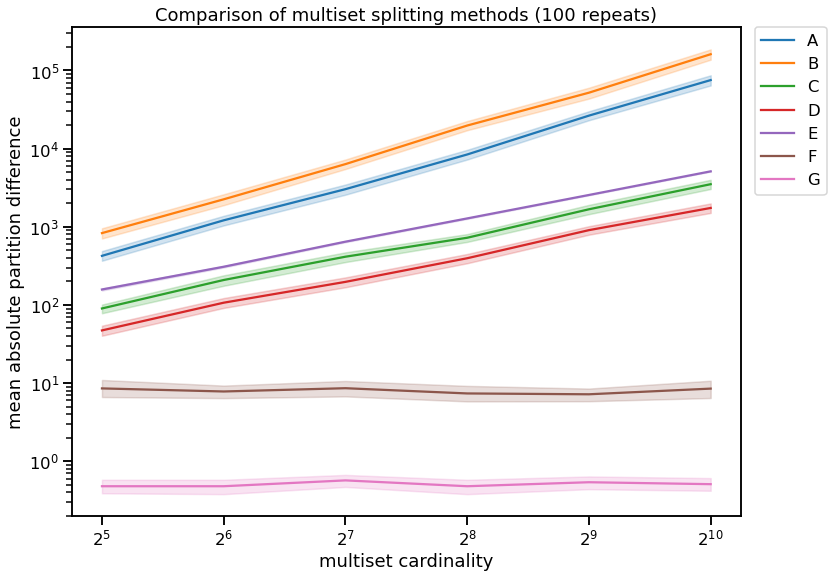

In [12]:
fig, ax = plt.subplots(figsize=(12, 9), facecolor='white')
ax = sns.lineplot(data=tall_df, x='cardinality', y='absolute_diff', hue='method', ci=95)
ax.set_xlabel('multiset cardinality')
ax.set_xscale('log', base=2)
ax.set_ylabel('mean absolute partition difference')
ax.set_yscale('log')
# Put legend outside plot
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Underscore assignment to supress Text object output
_ = ax.set_title(f'Comparison of multiset splitting methods ({REPEATS} repeats)')

Both of the above steps can be conveniently run by calling the `seaborn_plot()` method from `partition_problem.py`.  The inputs to this function are simply the raw result dictionary list, and the list of cardinality values used to generate the results:

```python
fig = seaborn_plot(results=testing_results, repeats=REPEATS)
```

### Plotting with pandas
This is a bit more 'DIY' than using Seaborn.

We will use the `groupby()` method of the `pandas.DataFrame` to aggregate the results by cardinality, and generate corresponding statistical values (*mean*, *std*).

This grouped form can then be easily used to plot with.

#### Group the data

In [13]:
# Group by cardinality and method - sort=False ensures we don't change the method order to alphabetical
group = tall_df.groupby(['cardinality', 'method'], as_index=False, sort=False)
# Dropping level 0 of axis 1 allows us to use 'mean' and 'std' as the column names
# instead of ('absolute_diff', 'mean') and ('absolute_diff', 'std')
stats_df = group.agg(['mean', 'std']).droplevel(axis=1, level=0)
# Some of the seaborn code above
stats_df

,,mean,std
cardinality,method,,
32,A,424.66,320.845355
64,A,1209.46,840.454031
128,A,3027.35,2336.039744
256,A,8408.68,6080.421352
512,A,26406.18,18051.520825
...,...,...,...
64,G,0.48,0.502117
128,G,0.57,0.497570
256,G,0.48,0.502117


#### Plot
We will iterate over (using `group()` again) each method, and add a plot to the axis.  The `pandas` plot will show error bars (not area) by default and, as we have calculated standard deviation in the initial aggregation, we will plot that instead of the 95% confidence interval.

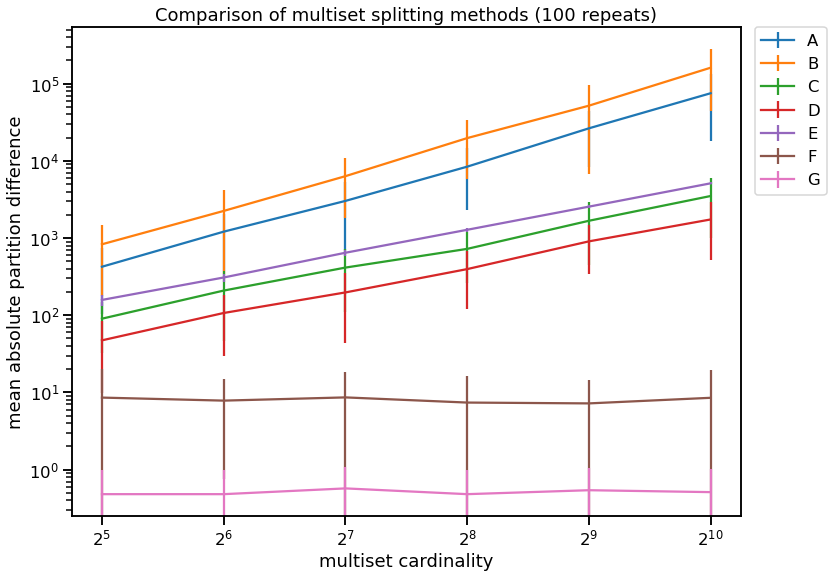

In [14]:
fig, ax = plt.subplots(figsize=(12, 9), facecolor='white')
# Iterate over each method and add the data to the plot
for key, group in stats_df.groupby('method'):
    group.reset_index(inplace=True)
    group.plot('cardinality', 'mean', yerr='std', label=key, ax=ax)
ax.set_xlabel('multiset cardinality')
ax.set_xscale('log', base=2)
ax.set_ylabel('mean absolute partition difference')
ax.set_yscale('log')
# Put legend outside plot
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# Underscore assignment to supress Text object output
_ = ax.set_title(f'Comparison of multiset splitting methods ({REPEATS} repeats)')

Again, this functionality can be easily accessed by using the `pandas_plot()` method from `partition_problem.py`:

```python
fig = pandas_plot(results=testing_results, repeats=REPEATS)
```

### Discussion - TODO
* Time complexity of method G?
* Low standard deviation for method E?

### References
[1] https://www.ijcai.org/Proceedings/09/Papers/096.pdf

### Resources used but not directly referenced
- https://en.wikipedia.org/wiki/Partition_problem
- https://pandasguide.readthedocs.io/en/latest/
- https://peps.python.org/pep-0008/
